In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("AI_Job_Data.csv")
df['is_manager_or_director'] = df['Job titiles'].str.lower().str.contains('manager|director').astype(int)
df['AI Impact'] = df['AI Impact'].str.rstrip('%').astype(float)
df = df[(df["Domain"] != 'Communication & PR') & (df["Domain"] != 'Law Enforcement')]
df

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain,is_manager_or_director
1,Data Collector,95.0,299,2148,0.139199,Data & IT,0
2,Data Entry,95.0,325,2278,0.142669,Administrative & Clerical,0
3,Mail Clerk,95.0,193,1366,0.141288,Leadership & Strategy,0
4,Compliance Officer,92.0,194,1369,0.141709,Medical & Healthcare,0
5,Chief Executive Officer (CEO),91.0,153,1135,0.134802,Supply Chain & Logistics,0
...,...,...,...,...,...,...,...
4701,Singer,5.0,686,2798,0.245175,Data & IT,0
4702,Airport,5.0,556,2206,0.252040,Administrative & Clerical,0
4703,Director,5.0,1316,4695,0.280298,Leadership & Strategy,1
4704,Nurse,5.0,710,2594,0.273709,Medical & Healthcare,0


In [21]:
df_2 = pd.read_csv("IndustryUnemployment.csv")
df_2 = df_2.rename(columns={'Leisure and Hospitality': 'Hospitality', 
                            'Wholesale and Retail Trade': 'Sales',
                            'Manufacturing': 'Construction',
                            'Education and Health Services': 'Medical & Healthcare',
                            'Information': 'Data & IT',
                            'Transportation and Utilities': 'Supply Chain & Logistics',
                            'Nonagriculture Industries': 'Administrative & Clerical',
                            'Professional and Business Services': 'Leadership & Strategy'
                            })
df_2 = df_2.drop(columns=['Financial Activities', 'Other Services', 'Agriculture and Related Industry'])
df_2

,Year,Administrative & Clerical,Construction,Sales,Supply Chain & Logistics,Data & IT,Leadership & Strategy,Medical & Healthcare,Hospitality
0,2010,9.9,10.2,9.5,7.9,9.7,10.9,5.8,12.2
1,2011,9.0,8.8,9.0,8.1,7.3,9.6,5.6,11.6
2,2012,7.9,7.1,8.1,6.9,7.6,8.9,5.6,10.4
3,2013,7.2,6.4,7.3,6.4,6.2,8.3,4.9,10.0
4,2014,5.9,4.7,6.1,5.5,5.2,6.9,4.2,8.6
5,2015,5.1,4.2,5.5,4.2,3.9,5.6,3.6,7.9
6,2016,4.7,4.2,5.0,4.1,4.6,5.1,3.3,6.8
7,2017,4.2,3.5,4.6,3.9,4.5,4.6,3.0,6.1
8,2018,3.8,3.3,4.4,3.3,3.7,3.9,2.7,5.7
9,2019,3.5,2.9,4.1,3.4,3.5,3.6,2.5,5.2


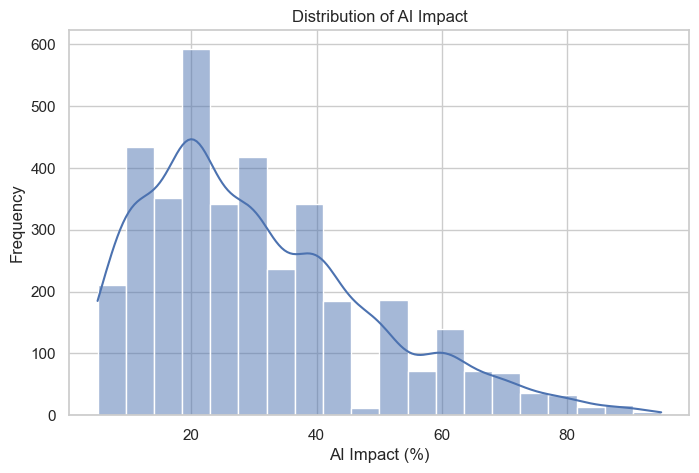

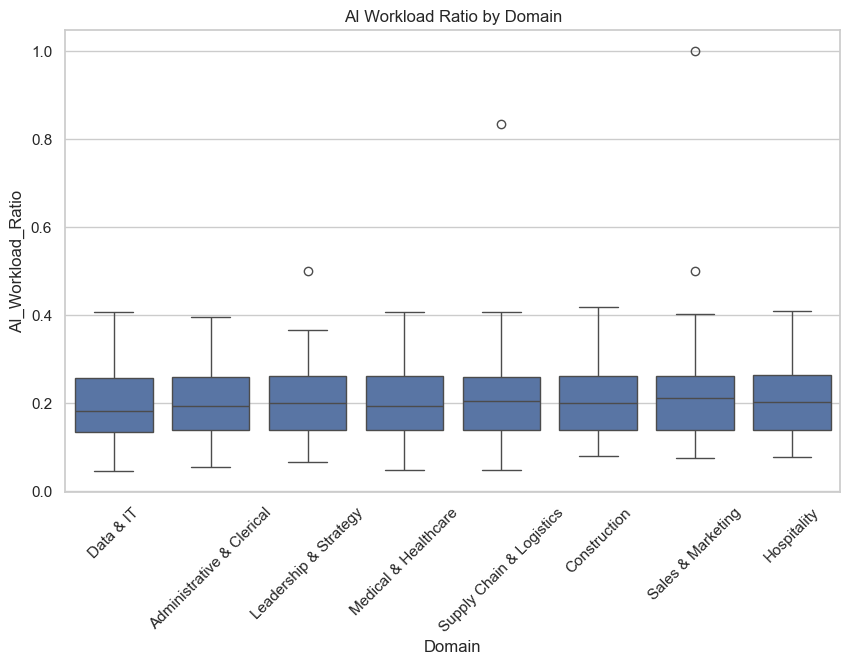

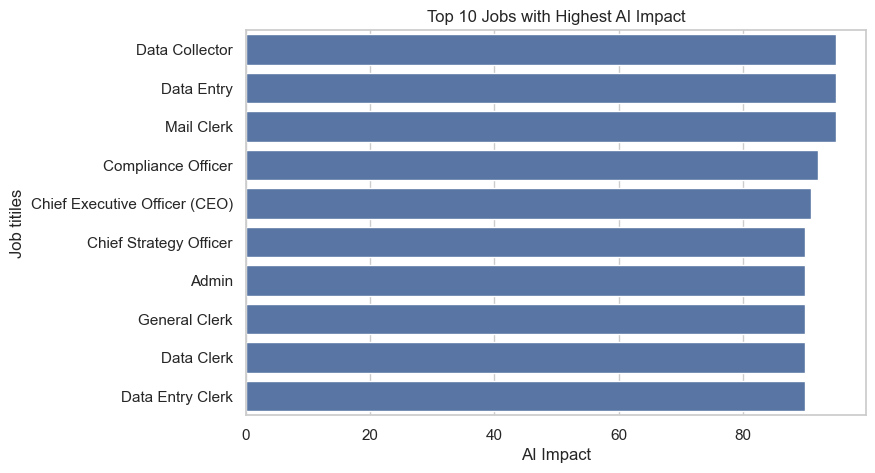

/Users/mihirjoshi/micromamba/lib/python3.9/site-packages/matplotlib/colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/Users/mihirjoshi/micromamba/lib/python3.9/site-packages/matplotlib/colors.py:1405: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


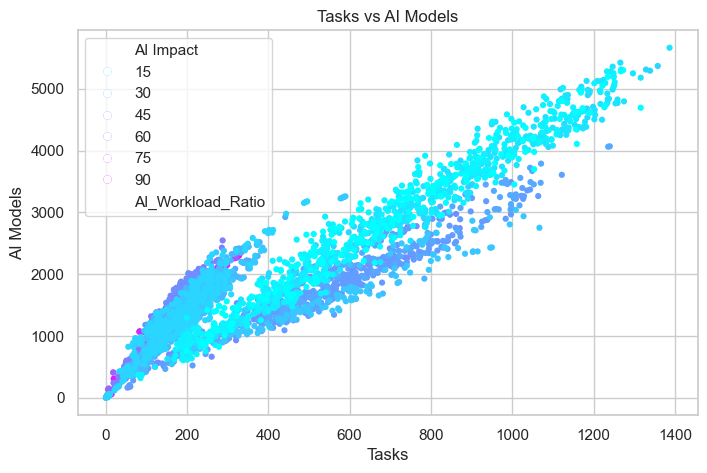

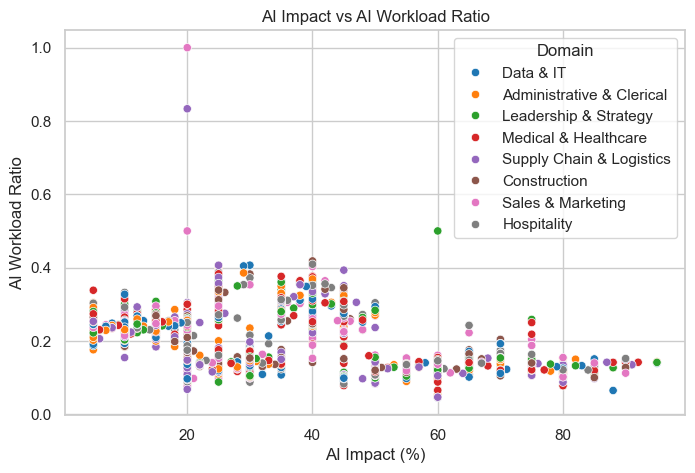

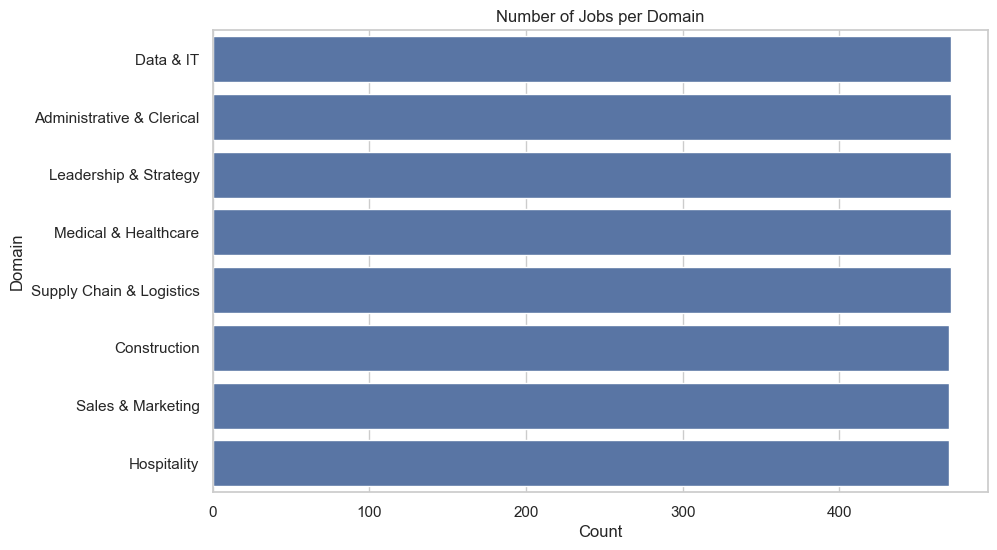

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame
# df = pd.read_csv('your_data.csv')

sns.set(style="whitegrid")

# 1. Distribution of AI Impact
plt.figure(figsize=(8, 5))
sns.histplot(df['AI Impact'].astype(float), bins=20, kde=True)
plt.title('Distribution of AI Impact')
plt.xlabel('AI Impact (%)')
plt.ylabel('Frequency')
plt.show()

# 2. AI Workload Ratio by Domain
plt.figure(figsize=(10, 6))
sns.boxplot(x='Domain', y='AI_Workload_Ratio', data=df)
plt.xticks(rotation=45)
plt.title('AI Workload Ratio by Domain')
plt.show()

# 3. Top 10 Jobs with Highest AI Impact
df['AI Impact'] = df['AI Impact'].astype(float)
top_jobs = df.nlargest(10, 'AI Impact')
plt.figure(figsize=(8, 5))
sns.barplot(x='AI Impact', y='Job titiles', data=top_jobs)
plt.title('Top 10 Jobs with Highest AI Impact')
plt.show()

# 4. Tasks vs AI Models
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Tasks', y='AI models', hue='AI Impact', size='AI_Workload_Ratio', data=df, palette='cool', sizes=(20, 200))
plt.title('Tasks vs AI Models')
plt.xlabel('Tasks')
plt.ylabel('AI Models')
plt.show()

# 5. AI Impact vs AI Workload Ratio
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AI Impact', y='AI_Workload_Ratio', hue='Domain', data=df, palette='tab10')
plt.title('AI Impact vs AI Workload Ratio')
plt.xlabel('AI Impact (%)')
plt.ylabel('AI Workload Ratio')
plt.show()

# 6. Jobs per Domain
plt.figure(figsize=(10, 6))
sns.countplot(y='Domain', data=df, order=df['Domain'].value_counts().index)
plt.title('Number of Jobs per Domain')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.show()


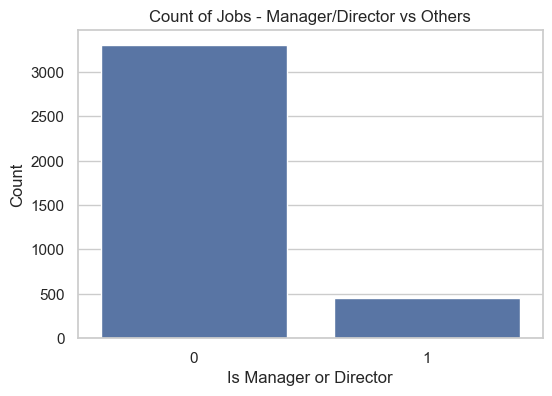

In [24]:
# 7. Countplot for is_manager_or_director
plt.figure(figsize=(6, 4))
sns.countplot(x='is_manager_or_director', data=df)
plt.title('Count of Jobs - Manager/Director vs Others')
plt.xlabel('Is Manager or Director')
plt.ylabel('Count')
plt.show()

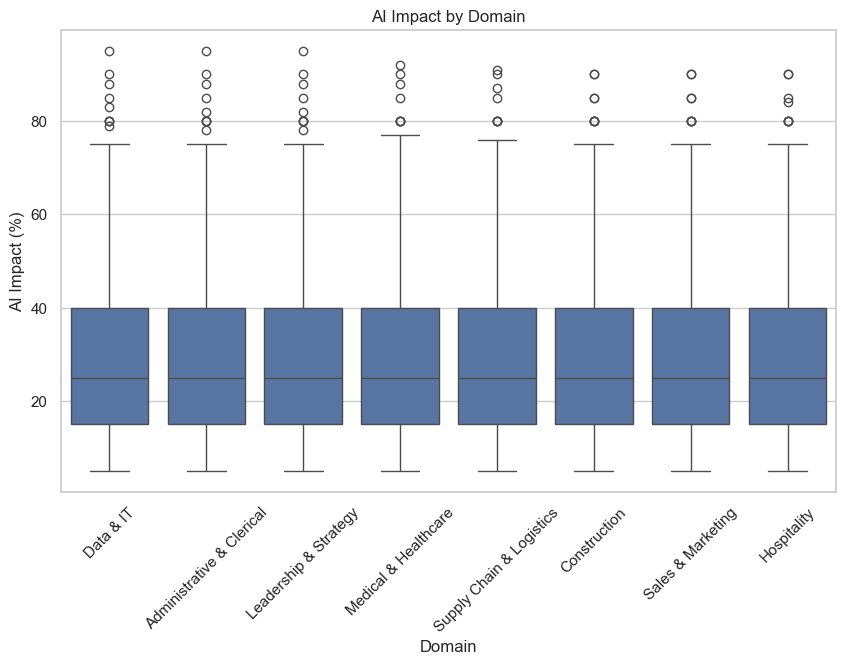

In [25]:
# 8. AI Impact by Domain
plt.figure(figsize=(10, 6))
sns.boxplot(x='Domain', y='AI Impact', data=df)
plt.xticks(rotation=45)
plt.title('AI Impact by Domain')
plt.xlabel('Domain')
plt.ylabel('AI Impact (%)')
plt.show()

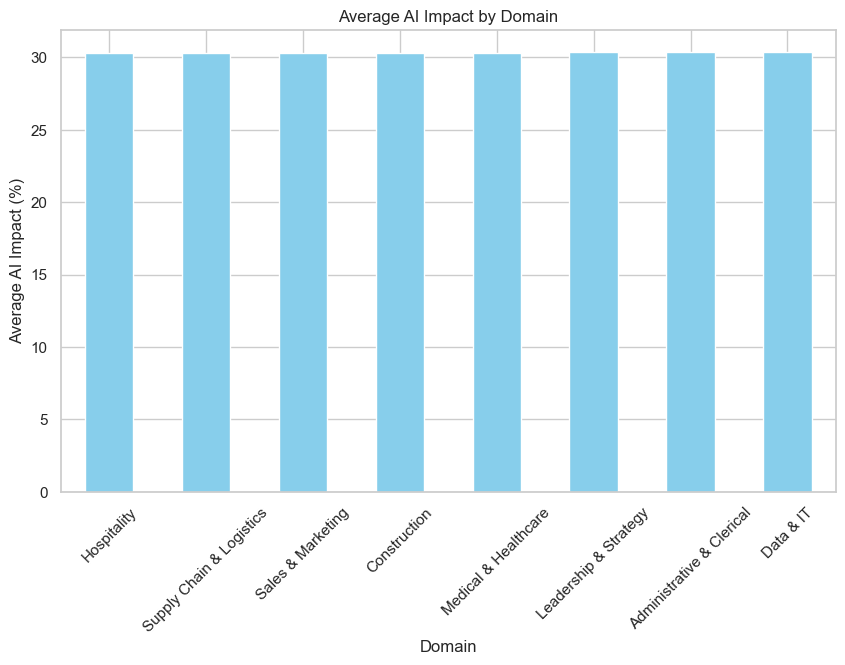

In [26]:
# AI Impact by Domain - Averages Bar Plot
plt.figure(figsize=(10, 6))
average_impact = df.groupby('Domain')['AI Impact'].mean().sort_values()
average_impact.plot(kind='bar', color='skyblue')
plt.title('Average AI Impact by Domain')
plt.xlabel('Domain')
plt.ylabel('Average AI Impact (%)')
plt.xticks(rotation=45)
plt.show()